In [41]:
kind="linear"

/tmp/ipykernel_25414/3891409217.py:19: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  interp_func = interpolate.interp2d(x_orig, y_orig, Z_orig, kind=kind)
/tmp/ipykernel_25414/3891409217.py:24: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `Lin

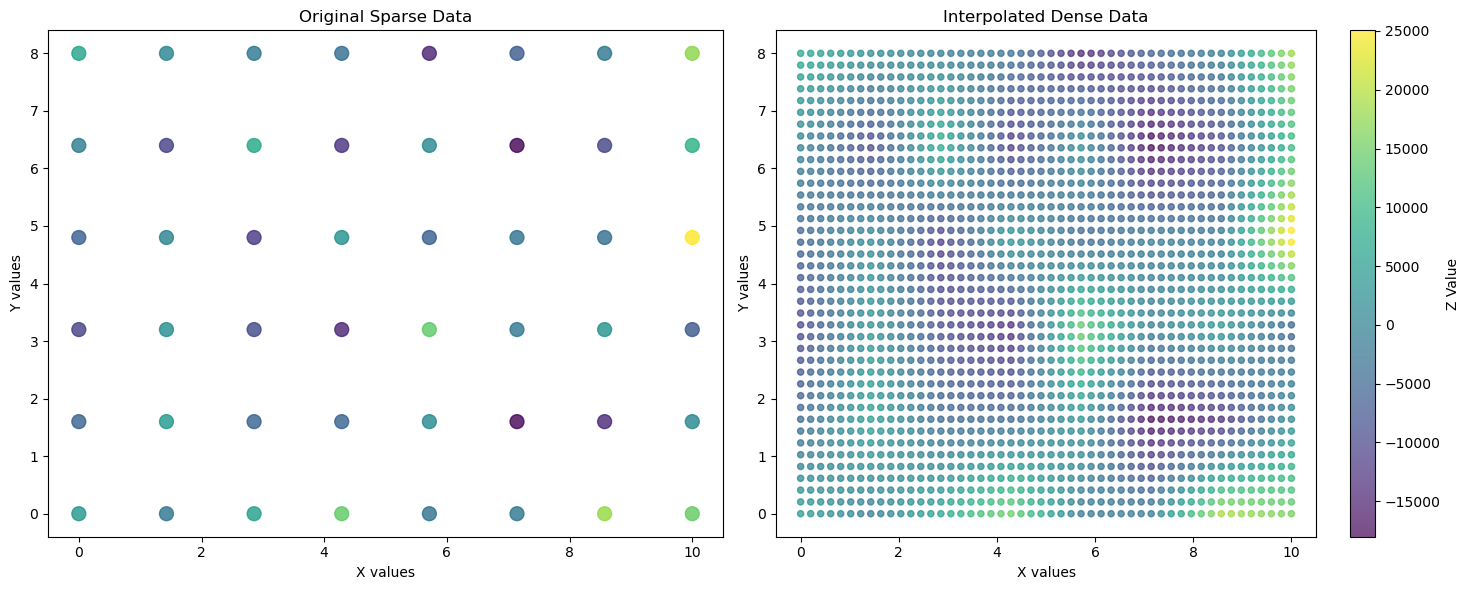

Original points: 48
Interpolated points: 2000


In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

# Create sparse original data
x_orig = np.linspace(0, 10, 8)  # Fewer original points
y_orig = np.linspace(0, 8, 6)   # Fewer original points
X_orig, Y_orig = np.meshgrid(x_orig, y_orig)

# Calculate Z values for original sparse data
Z_orig = (2*X_orig**4 - 15*X_orig**3 + 30*X_orig**2 - 20*X_orig + 5 + 
          10*np.sin(X_orig) + 5*np.cos(Y_orig) + X_orig*Y_orig/10)

# Add noise
np.random.seed(42)
Z_orig += np.random.normal(0, 10000, Z_orig.shape)

# Create interpolation function
interp_func = interpolate.interp2d(x_orig, y_orig, Z_orig, kind=kind)

# Create denser grid for interpolation
x_dense = np.linspace(0, 10, 50)  # More points
y_dense = np.linspace(0, 8, 40)   # More points
Z_interp = interp_func(x_dense, y_dense)

# Create meshgrid for plotting
X_dense, Y_dense = np.meshgrid(x_dense, y_dense)

# Flatten for scatter plot
x_flat = X_dense.flatten()
y_flat = Y_dense.flatten()
z_flat = Z_interp.flatten()

# Plot interpolated data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Original sparse data
ax1.scatter(X_orig.flatten(), Y_orig.flatten(), c=Z_orig.flatten(), 
           cmap='viridis', s=100, alpha=0.8)
ax1.set_title('Original Sparse Data')
ax1.set_xlabel('X values')
ax1.set_ylabel('Y values')

# Interpolated dense data
scatter = ax2.scatter(x_flat, y_flat, c=z_flat, 
                     cmap='viridis', s=20, alpha=0.7)
ax2.set_title('Interpolated Dense Data')
ax2.set_xlabel('X values')
ax2.set_ylabel('Y values')

plt.colorbar(scatter, ax=ax2, label='Z Value')
plt.tight_layout()
plt.show()

print(f"Original points: {X_orig.size}")
print(f"Interpolated points: {len(x_flat)}")